<a href="https://colab.research.google.com/github/ByteMechanic24/Project1/blob/main/demomodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [22]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.7
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


In [4]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [25]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/train'
valid_path = '/content/drive/MyDrive/Datasets/test'

In [24]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [26]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [27]:
folders = glob('/content/drive/MyDrive/Datasets/train/*')

In [28]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [29]:
prediction = Dense(len(folders), activation='softmax')(x)


# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [30]:
# view the structure of the model
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_94 (Conv2D)        │ (None, 111, 111, 32)   │            864 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_94    │ (None, 111, 111, 32)   │             96 │ conv2d_94[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_94             │ (None, 111, 111, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_95 (Conv2D)        │ (None, 109, 109, 32)   │          9,216 │ activation_94[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_95    │ (None, 109, 109, 32)   │             96 │ conv2d_95[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_95             │ (None, 109, 109, 32)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_96 (Conv2D)        │ (None, 109, 109, 64)   │         18,432 │ activation_95[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_96    │ (None, 109, 109, 64)   │            192 │ conv2d_96[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_96             │ (None, 109, 109, 64)   │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 54, 54, 64)     │              0 │ activation_96[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_97 (Conv2D)        │ (None, 54, 54, 80)     │          5,120 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_97    │ (None, 54, 54, 80)     │            240 │ conv2d_97[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_97             │ (None, 54, 54, 80)     │              0 │ batch_normalization_9… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_98 (Conv2D)   

 Total params: 22,109,990 (84.34 MB)

 Trainable params: 307,206 (1.17 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

In [31]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [32]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [33]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/train',  # Update with the correct path
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode='categorical')


Found 3009 images belonging to 6 classes.


In [34]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/test', # Update with the correct path
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')


Found 5508 images belonging to 6 classes.


In [35]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


95/95 ━━━━━━━━━━━━━━━━━━━━ 3198s 33s/step - accuracy: 0.5425 - loss: 6.4471 - val_accuracy: 0.5966 - val_loss: 5.4432
Epoch 2/10


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


95/95 ━━━━━━━━━━━━━━━━━━━━ 33s 349ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1005s 11s/step - accuracy: 0.8161 - loss: 1.1311 - val_accuracy: 0.6367 - val_loss: 5.5779
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1050s 11s/step - accuracy: 0.8390 - loss: 1.1013 - val_accuracy: 0.5810 - val_loss: 7.2153
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1043s 11s/step - accuracy: 0.8785 - loss: 0.9124 - val_accuracy: 0.6313 - val_loss: 6.9979
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 50s 522ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1013s 11s/step - accuracy: 0.9147 - loss: 0.6156 - val_accuracy: 0.6445 - val_loss: 9.0973
Epoch 10/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00


In [36]:
import matplotlib.pyplot as plt

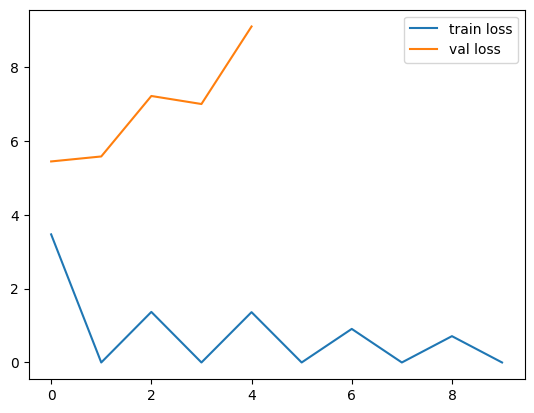

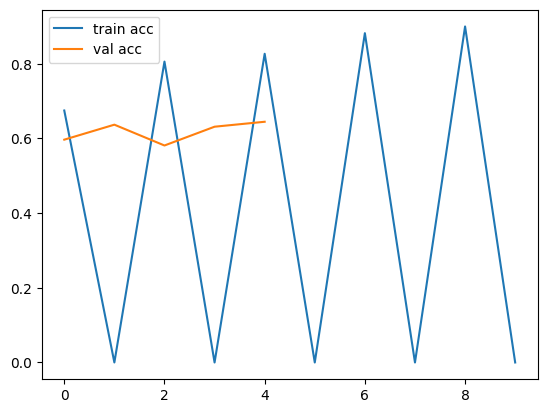

<Figure size 640x480 with 0 Axes>

In [37]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [38]:
from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [39]:
y_pred = model.predict(test_set)

173/173 ━━━━━━━━━━━━━━━━━━━━ 642s 4s/step


In [40]:
y_pred

array([[6.6682270e-30, 9.9999994e-01, 2.5248367e-18, 6.3262547e-28,
        8.2442026e-19, 5.5336122e-25],
       [1.5668380e-03, 2.0048653e-01, 1.2813171e-09, 1.8448612e-01,
        6.0993946e-01, 3.5210007e-03],
       [6.1006525e-14, 1.2809649e-19, 3.0999008e-12, 9.9999994e-01,
        2.6722606e-16, 1.6477868e-12],
       ...,
       [1.1467190e-02, 9.8843658e-01, 3.2645897e-08, 9.5220596e-05,
        7.9462541e-15, 1.0327190e-06],
       [9.2003465e-01, 2.8220529e-02, 5.1522393e-02, 2.0845118e-04,
        1.8241029e-09, 1.3898328e-05],
       [3.3654636e-13, 1.5051197e-02, 2.0248246e-08, 2.6185517e-06,
        9.8494613e-01, 2.1334613e-13]], dtype=float32)

In [41]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)


In [42]:
y_pred

array([1, 4, 3, ..., 1, 0, 4])

In [47]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

model=load_model('model_inception.h5')

# Load and preprocess the image
img_path = '/content/drive/MyDrive/Datasets/test/cardboard/cardboard1.jpg'  # Replace with the actual path to your image
img = image.load_img(img_path, target_size=(224, 224))  # Load the image and resize it
img_data = image.img_to_array(img)  # Convert the image to a NumPy array
img_data = np.expand_dims(img_data, axis=0)  # Add an extra dimension for batch size
img_data = preprocess_input(img_data)  # Preprocess the image for the InceptionV3 model



In [48]:
img_data

array([[[[ 0.88235295,  0.5686275 ,  0.2941177 ],
         [ 0.8980392 ,  0.58431375,  0.30980396],
         [ 0.90588236,  0.5921569 ,  0.3176471 ],
         ...,
         [ 0.69411767,  0.34901965,  0.12156868],
         [ 0.67058825,  0.32549024,  0.09803927],
         [ 0.69411767,  0.34901965,  0.12156868]],

        [[ 0.9137255 ,  0.6       ,  0.32549024],
         [ 0.92156863,  0.60784316,  0.33333337],
         [ 0.9137255 ,  0.6       ,  0.32549024],
         ...,
         [ 0.7019608 ,  0.35686278,  0.12941182],
         [ 0.7019608 ,  0.35686278,  0.12941182],
         [ 0.6862745 ,  0.3411765 ,  0.11372554]],

        [[ 0.92156863,  0.60784316,  0.33333337],
         [ 0.92941177,  0.6156863 ,  0.3411765 ],
         [ 0.92941177,  0.6156863 ,  0.3411765 ],
         ...,
         [ 0.70980394,  0.36470592,  0.13725495],
         [ 0.7254902 ,  0.3803922 ,  0.15294123],
         [ 0.69411767,  0.34901965,  0.12156868]],

        ...,

        [[ 0.4901961 ,  0.18431377, -0

In [49]:
img=image.load_img('/content/drive/MyDrive/Datasets/test/cardboard/cardboard1.jpg',target_size=(224,224))

In [50]:
x=image.img_to_array(img)
x

array([[[240., 200., 165.],
        [242., 202., 167.],
        [243., 203., 168.],
        ...,
        [216., 172., 143.],
        [213., 169., 140.],
        [216., 172., 143.]],

       [[244., 204., 169.],
        [245., 205., 170.],
        [244., 204., 169.],
        ...,
        [217., 173., 144.],
        [217., 173., 144.],
        [215., 171., 142.]],

       [[245., 205., 170.],
        [246., 206., 171.],
        [246., 206., 171.],
        ...,
        [218., 174., 145.],
        [220., 176., 147.],
        [216., 172., 143.]],

       ...,

       [[190., 151., 122.],
        [185., 145., 119.],
        [181., 144., 117.],
        ...,
        [113.,  88.,  66.],
        [114.,  89.,  67.],
        [116.,  91.,  69.]],

       [[187., 148., 119.],
        [189., 149., 123.],
        [184., 147., 120.],
        ...,
        [113.,  88.,  66.],
        [114.,  89.,  67.],
        [115.,  90.,  68.]],

       [[186., 147., 118.],
        [183., 143., 117.],
        [182., 1

In [51]:
x.shape

(224, 224, 3)

In [52]:
x=x/255

In [53]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [54]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[3.7636498e-03, 3.5811952e-04, 7.0396569e-03, 7.1219588e-03,
        2.4393611e-02, 9.5732301e-01]], dtype=float32)

In [58]:
a=np.argmax(model.predict(img_data), axis=1)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


In [59]:
a==1


array([False])

In [60]:
a==0


array([False])

In [66]:
a==6

array([False])

In [67]:
a==2

array([False])

In [68]:
a==3

array([False])

In [69]:
a==4

array([False])

In [70]:
a==5

array([ True])

In [71]:
import tensorflow as tf

In [72]:
tf.__version__

'2.17.1'